In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import geopandas as gpd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
from shapely import wkt
from matplotlib.colors import LinearSegmentedColormap
from shapely.geometry import MultiPolygon
from shapely.geometry import MultiPolygon, GeometryCollection
from shapely.ops import cascaded_union
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize

In [4]:
hogares_nbi = pd.read_excel("C:/Users/TANIA/Documents/Liam Data science/CV_02_AX02_2010.xlsx")
hogares_nbi

,Hogares y población censados en viviendas particulares y hogares y población con Necesidades Básicas Insatisfechas (NBI) por comuna. Ciudad de Buenos Aires. Año 2010,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Comuna,Hogares,NaN,NaN,Población,NaN,NaN
1,NaN,Total,Con NBI,NaN,Total,Con NBI,NaN
2,NaN,NaN,Absolutos,%,NaN,Absolutos,%
3,Total,1150134,68776,5.979825,2827535,198114,7.006598
4,1,84468,13429,15.898328,189339,34311,18.121465
5,2,73156,1497,2.046312,152256,3693,2.42552
6,3,80489,9560,11.877399,181871,22897,12.589693
7,4,76455,9678,12.658427,215629,32157,14.913115
8,5,76846,4652,6.053666,175338,11079,6.318653
9,6,75189,1656,2.20245,172815,4219,2.441339


In [15]:
data = {'COMUNA': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
        'HOGARES_TOT_NBI': [13.429, 1.497, 9.560, 9.678, 4.652, 1.656, 7.040, 6.582, 2.345, 2.149, 1.444, 1.335, 1.881, 2.423, 3.105]}
         
# Crear DataFrame
nbi_por_comuna = pd.DataFrame(data)

# Imprimir el resultado
print(nbi_por_comuna)

    COMUNA  HOGARES_TOT_NBI
0        1           13.429
1        2            1.497
2        3            9.560
3        4            9.678
4        5            4.652
5        6            1.656
6        7            7.040
7        8            6.582
8        9            2.345
9       10            2.149
10      11            1.444
11      12            1.335
12      13            1.881
13      14            2.423
14      15            3.105


In [16]:
poblacion_nbi = [34.311, 3.693, 22.897, 32.157, 11.079, 4.219, 21.350, 25.844, 8.504, 6.248, 4.475, 3.853, 4.426, 5.873, 9.185]

# Agregar la columna al DataFrame existente
nbi_por_comuna['POBLACION_TOT_NBI'] = poblacion_nbi

# Imprimir el resultado
print(nbi_por_comuna)

    COMUNA  HOGARES_TOT_NBI  POBLACION_TOT_NBI
0        1           13.429             34.311
1        2            1.497              3.693
2        3            9.560             22.897
3        4            9.678             32.157
4        5            4.652             11.079
5        6            1.656              4.219
6        7            7.040             21.350
7        8            6.582             25.844
8        9            2.345              8.504
9       10            2.149              6.248
10      11            1.444              4.475
11      12            1.335              3.853
12      13            1.881              4.426
13      14            2.423              5.873
14      15            3.105              9.185


In [17]:
nbi_por_comuna

,COMUNA,HOGARES_TOT_NBI,POBLACION_TOT_NBI
0,1,13.429,34.311
1,2,1.497,3.693
2,3,9.560,22.897
3,4,9.678,32.157
4,5,4.652,11.079
5,6,1.656,4.219
6,7,7.040,21.350
7,8,6.582,25.844
8,9,2.345,8.504
9,10,2.149,6.248


In [18]:
CircuitosElectorales = gpd.read_file("C:/Users/TANIA/Documents/Liam Data science/circuitos-electorales.csv")
CircuitosElectorales

,WKT,ID,CIRCUITO_N,COMUNA,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA,geometry
0,MULTIPOLYGON (((-58.3661871461469 -34.62043128...,001,1,1,SAN TELMO,11377.00000000000,5695.00000000000,5682.00000000000,4157.17556283000,709721.55022900004,"MULTIPOLYGON (((-58.36619 -34.62043, -58.36606..."
1,MULTIPOLYGON (((-58.3773566900831 -34.61744732...,002,2,1,SAN TELMO,11365.00000000000,5870.00000000000,5495.00000000000,3045.85873489000,523430.86001399998,"MULTIPOLYGON (((-58.37736 -34.61745, -58.37743..."
2,MULTIPOLYGON (((-58.3572938809189 -34.59510562...,003,3,1,PUERTO MADERO,702.00000000000,416.00000000000,286.00000000000,14439.58562320000,4248032.90197000000,"MULTIPOLYGON (((-58.35729 -34.59511, -58.35723..."
3,MULTIPOLYGON (((-58.3671229141027 -34.61213671...,004,4,1,PUERTO MADERO,489.00000000000,307.00000000000,182.00000000000,8028.11547007000,777372.45509700000,"MULTIPOLYGON (((-58.36712 -34.61214, -58.36762..."
4,MULTIPOLYGON (((-58.3835637305124 -34.57823507...,005,5,1,RETIRO,5275.00000000000,3131.00000000000,2144.00000000000,16401.98147680000,3262096.05041000010,"MULTIPOLYGON (((-58.38356 -34.57824, -58.38328..."
...,...,...,...,...,...,...,...,...,...,...,...
162,MULTIPOLYGON (((-58.4133289404238 -34.64349004...,057,57,4,NUEVA POMPEYA,18768.00000000000,9532.00000000000,9236.00000000000,6341.98611558000,1681075.20221000000,"MULTIPOLYGON (((-58.41333 -34.64349, -58.41254..."
163,MULTIPOLYGON (((-58.4752520574717 -34.66896222...,089,89,8,VILLA LUGANO,46140.00000000000,23699.00000000000,22441.00000000000,10058.06223910000,4524565.79088000020,"MULTIPOLYGON (((-58.47525 -34.66896, -58.47441..."
164,MULTIPOLYGON (((-58.464421436223 -34.660057142...,090,90,8,VILLA LUGANO,42538.00000000000,21474.00000000000,21064.00000000000,10870.01898480000,4771793.77496999970,"MULTIPOLYGON (((-58.46442 -34.66006, -58.46448..."
165,MULTIPOLYGON (((-58.4713146924268 -34.63664464...,112,112,10,FLORESTA,8290.00000000000,3945.00000000000,4345.00000000000,3067.80447799000,542171.08825499995,"MULTIPOLYGON (((-58.47131 -34.63664, -58.47131..."


In [19]:
# Convertir la columna 'COMUNA' en ambos DataFrames al tipo de dato común (puedes usar int64 o object según tus necesidades)
nbi_por_comuna['COMUNA'] = nbi_por_comuna['COMUNA'].astype(int)
CircuitosElectorales['COMUNA'] = CircuitosElectorales['COMUNA'].astype(int)

# Realizar el merge con outer join basado en la columna 'COMUNA'
resultado_final = pd.merge(nbi_por_comuna, CircuitosElectorales, on='COMUNA', how='outer')

# Imprimir el resultado
print(resultado_final)



     COMUNA  HOGARES_TOT_NBI  POBLACION_TOT_NBI  \
0         1           13.429             34.311   
1         1           13.429             34.311   
2         1           13.429             34.311   
3         1           13.429             34.311   
4         1           13.429             34.311   
..      ...              ...                ...   
162      15            3.105              9.185   
163      15            3.105              9.185   
164      15            3.105              9.185   
165      15            3.105              9.185   
166      15            3.105              9.185   

                                                   WKT   ID CIRCUITO_N  \
0    MULTIPOLYGON (((-58.3661871461469 -34.62043128...  001          1   
1    MULTIPOLYGON (((-58.3773566900831 -34.61744732...  002          2   
2    MULTIPOLYGON (((-58.3572938809189 -34.59510562...  003          3   
3    MULTIPOLYGON (((-58.3671229141027 -34.61213671...  004          4   
4    MULTIPOLYGON

In [20]:
resultado_final

,COMUNA,HOGARES_TOT_NBI,POBLACION_TOT_NBI,WKT,ID,CIRCUITO_N,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA,geometry
0,1,13.429,34.311,MULTIPOLYGON (((-58.3661871461469 -34.62043128...,001,1,SAN TELMO,11377.00000000000,5695.00000000000,5682.00000000000,4157.17556283000,709721.55022900004,"MULTIPOLYGON (((-58.36619 -34.62043, -58.36606..."
1,1,13.429,34.311,MULTIPOLYGON (((-58.3773566900831 -34.61744732...,002,2,SAN TELMO,11365.00000000000,5870.00000000000,5495.00000000000,3045.85873489000,523430.86001399998,"MULTIPOLYGON (((-58.37736 -34.61745, -58.37743..."
2,1,13.429,34.311,MULTIPOLYGON (((-58.3572938809189 -34.59510562...,003,3,PUERTO MADERO,702.00000000000,416.00000000000,286.00000000000,14439.58562320000,4248032.90197000000,"MULTIPOLYGON (((-58.35729 -34.59511, -58.35723..."
3,1,13.429,34.311,MULTIPOLYGON (((-58.3671229141027 -34.61213671...,004,4,PUERTO MADERO,489.00000000000,307.00000000000,182.00000000000,8028.11547007000,777372.45509700000,"MULTIPOLYGON (((-58.36712 -34.61214, -58.36762..."
4,1,13.429,34.311,MULTIPOLYGON (((-58.3835637305124 -34.57823507...,005,5,RETIRO,5275.00000000000,3131.00000000000,2144.00000000000,16401.98147680000,3262096.05041000010,"MULTIPOLYGON (((-58.38356 -34.57824, -58.38328..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,15,3.105,9.185,MULTIPOLYGON (((-58.4385362537971 -34.58866797...,163,163,CHACARITA,12324.00000000000,6136.00000000000,6188.00000000000,5552.51934428000,1166537.28831000000,"MULTIPOLYGON (((-58.43854 -34.58867, -58.43864..."
163,15,3.105,9.185,MULTIPOLYGON (((-58.4592333026388 -34.59668669...,164,164,CHACARITA,10840.00000000000,5296.00000000000,5544.00000000000,6194.60805713000,1951553.07230000010,"MULTIPOLYGON (((-58.45923 -34.59669, -58.45927..."
164,15,3.105,9.185,MULTIPOLYGON (((-58.4680930843349 -34.57290849...,165,165,VILLA ORTUZAR,18875.00000000000,9050.00000000000,9825.00000000000,5682.32439895000,1853740.24651000000,"MULTIPOLYGON (((-58.46809 -34.57291, -58.46735..."
165,15,3.105,9.185,MULTIPOLYGON (((-58.470817935025 -34.587449264...,166,166,PARQUE CHAS,15685.00000000000,7487.00000000000,8198.00000000000,4524.98563466000,1384888.62690000000,"MULTIPOLYGON (((-58.47082 -34.58745, -58.47124..."


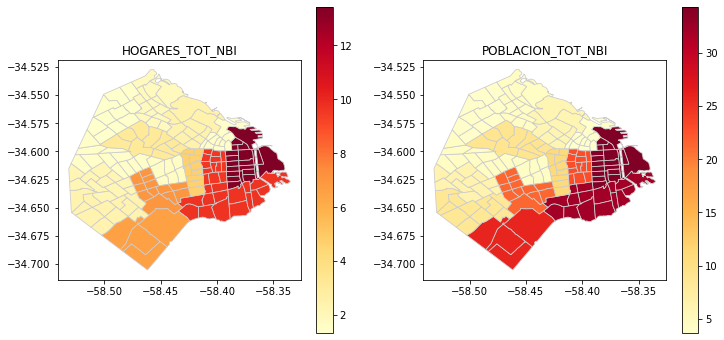

In [22]:


# Crear un GeoDataFrame a partir de los datos proporcionados
gdf = gpd.GeoDataFrame(resultado_final, geometry='geometry')

# Visualizar el heatmap para HOGARES_TOT_NBI
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Heatmap para HOGARES_TOT_NBI
gdf.plot(column='HOGARES_TOT_NBI', cmap='YlOrRd', linewidth=0.8, ax=ax[0], edgecolor='0.8', legend=True)
ax[0].set_title('HOGARES_TOT_NBI')

# Heatmap para POBLACION_TOT_NBI
gdf.plot(column='POBLACION_TOT_NBI', cmap='YlOrRd', linewidth=0.8, ax=ax[1], edgecolor='0.8', legend=True)
ax[1].set_title('POBLACION_TOT_NBI')

plt.show()


C:\Users\TANIA\AppData\Local\Temp\ipykernel_2772\2828709289.py:3: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  return cascaded_union(geometrias)


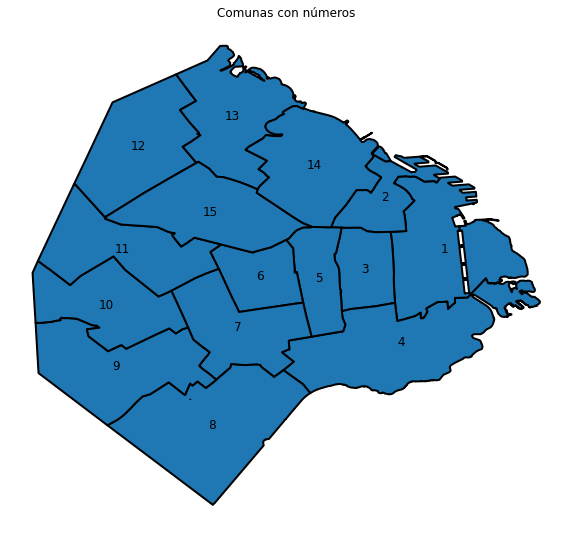

In [23]:
def unir_geometrias(grupo):
    geometrias = [geom for geom in grupo.geometry]
    return cascaded_union(geometrias)
CircuitosElectorales.columns
# Agrupar por 'departamen' y unir las geometrías de cada grupo (comuna)
comunas_agrupadas = CircuitosElectorales.groupby('COMUNA').apply(unir_geometrias)
# Crear un nuevo GeoDataFrame con las comunas agrupadas
nuevo_geodf = gpd.GeoDataFrame(geometry=comunas_agrupadas, crs=CircuitosElectorales.crs)


# ####### MAPA POR COMUNAS #######
# Plot de las comunas
ax = nuevo_geodf.plot(figsize=(10, 10), edgecolor='black', linewidth=2)

# Agregar etiquetas con el nombre de las comunas en el centro
for idx, row in nuevo_geodf.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(idx, (centroid.x, centroid.y), color='black', fontsize=12, ha='center', va='center')

plt.title('Comunas con números')
plt.axis('off')
plt.show()

C:\Users\TANIA\AppData\Local\Temp\ipykernel_2772\1375712344.py:8: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  return cascaded_union(geometrias)


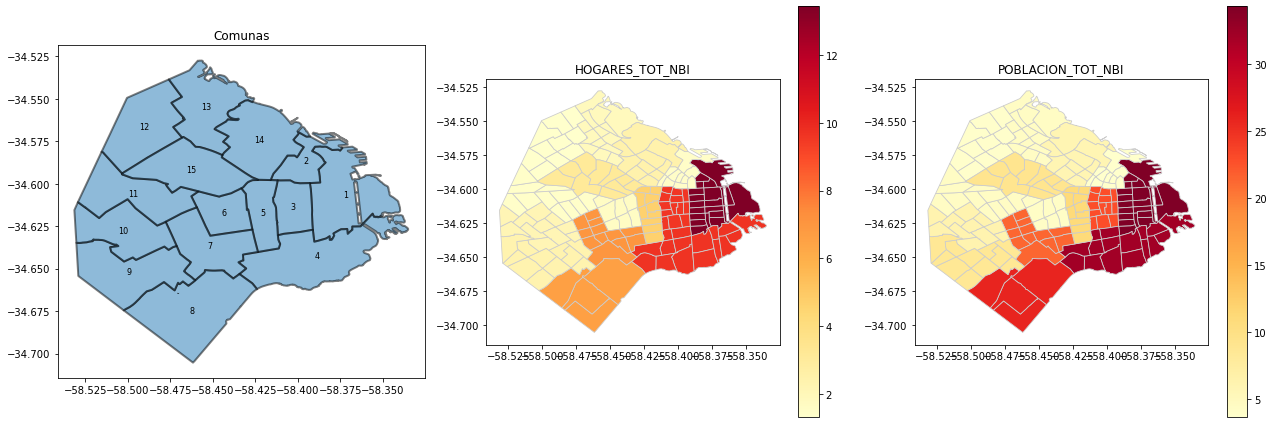

In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union

# Definir la función para unir geometrías
def unir_geometrias(grupo):
    geometrias = [geom for geom in grupo.geometry]
    return cascaded_union(geometrias)

# Agrupar por 'COMUNA' y unir las geometrías de cada grupo
comunas_agrupadas = CircuitosElectorales.groupby('COMUNA').apply(unir_geometrias)

# Crear un nuevo GeoDataFrame con las comunas agrupadas
nuevo_geodf = gpd.GeoDataFrame(geometry=comunas_agrupadas, crs=CircuitosElectorales.crs)

# Crear el subplot con 3 columnas
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# ####### MAPA POR COMUNAS #######
# Plot de las comunas con transparencia
nuevo_geodf.plot(ax=ax[0], edgecolor='black', linewidth=2, alpha=0.5)

# Agregar etiquetas con el nombre de las comunas en el centro
for idx, row in nuevo_geodf.iterrows():
    centroid = row['geometry'].centroid
    ax[0].annotate(idx, (centroid.x, centroid.y), color='black', fontsize=8, ha='center', va='center')

ax[0].set_title('Comunas')

# ####### HEATMAP PARA HOGARES_TOT_NBI #######
# Heatmap para HOGARES_TOT_NBI
gdf.plot(column='HOGARES_TOT_NBI', cmap='YlOrRd', linewidth=0.8, ax=ax[1], edgecolor='0.8', legend=True)
ax[1].set_title('HOGARES_TOT_NBI')

# ####### HEATMAP PARA POBLACION_TOT_NBI #######
# Heatmap para POBLACION_TOT_NBI
gdf.plot(column='POBLACION_TOT_NBI', cmap='YlOrRd', linewidth=0.8, ax=ax[2], edgecolor='0.8', legend=True)
ax[2].set_title('POBLACION_TOT_NBI')

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar el mapa
plt.show()


